## Churn Prediction Assessment - Exploratory Data Analysis

Predicting whether a customer will cancel a product or service is crucial for companies to anticipate such situations and take timely actions. This study analyzes real data from individuals holding financial products at a major bank in Argentina. The dataset includes 170,722 records for training and validation, with 103 variables used to predict whether a customer will cancel within the next two months.

#### **Library Import and Initial Validations/Transformations**

In [232]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200) # Display all columns

In [233]:
# Load the csv file into a dataframe without the index column and preview it
df = pd.read_csv("../data/raw/Modelo_Clasificacion_Dataset.csv", index_col = [0])
df.head()

,X,numero_de_cliente,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,1,4566150,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,2,4566430,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,3,4566445,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,4,4566621,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,6,4566907,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0

In [234]:
# Drop the first column 'X' that looks like an unnecessary index and the customer ID since it doesn't provide any useful information for our future predictive models
df = df.drop(['X', 'numero_de_cliente'], axis = 1)
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.0

In [235]:
# Rename columns: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_cuenta_estado,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_fechaalta,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.0

In [236]:
# Preview dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170722 entries, 0 to 189593
Columns: 103 entries, cliente_vip to clase_binaria
dtypes: float64(49), int64(53), object(1)
memory usage: 135.5+ MB


The dataset contains 170,722 rows, indexed from 0 to 189,593, which indicates that some rows may have been dropped or filtered during preprocessing. It includes a total of 103 columns, ranging from cliente_vip to clase_binaria. In terms of data types, there are 49 columns with float64 values, 53 with int64 values, and 1 column with object type, which likely contains string or categorical data.

In [237]:
# Correct index (0 to 170721)
df.reset_index(drop = True, inplace = True)

#### **Data Types Handling**

In [238]:
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows

In [239]:
# Check column names and data types
print(df.dtypes)

cliente_vip                             int64
internet                                int64
cliente_edad                            int64
cliente_antiguedad                      int64
mrentabilidad                         float64
mrentabilidad_anual                   float64
mcomisiones                           float64
mactivos_margen                       float64
mpasivos_margen                       float64
cant_total_prod                         int64
tpaquete1                               int64
tpaquete2                               int64
tpaquete3                               int64
tpaquete4                               int64
tpaquete5                               int64
tpaquete6                               int64
tpaquete7                               int64
tpaquete8                               int64
tpaquete9                               int64
tcuentas                                int64
mdescubierto_preacordado              float64
mcuentas_saldo                    

##### Datetime Values

In [240]:
# Change Visa_fechaalta data type to datetime
# Ensure the column is treated as an integer (to remove decimal points)
# Handle nulls properly by using 'errors' parameter if necessary
df['visa_fechaalta'] = pd.to_numeric(df['visa_fechaalta'], errors = 'coerce')

# Convert to datetime, treating NaNs (null values) as valid dates
df['visa_fechaalta'] = pd.to_datetime(df['visa_fechaalta'], format='%Y%m%d', errors='coerce')

# Verify the changes
print(df['visa_fechaalta'].head())

0   2013-05-20
1   2006-02-10
2   1996-08-26
3   2015-02-04
4   2005-02-03
Name: visa_fechaalta, dtype: datetime64[ns]


As we said before, classic machine learning models do not directly handle date (datetime) types because they are not numerical values. Models typically require numeric input to perform mathematical operations and calculate relationships between features. Dates, being categorical or time-related data, must be transformed into numerical representations (such as the number of days, months, or years) to be effectively used in these models. That's why we are going to change visa_fechaalta dates into a difference between that date and current date (tenure).

In [241]:
# Transform visa_fechaalta into days of tenure
from datetime import datetime
df['visa_tenure_days'] = (datetime.now() - df['visa_fechaalta']).dt.days
df = df.drop(columns=['visa_fechaalta'])
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_cuenta_estado,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,CONTINUA,4473.0
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,CONTINUA,7129.0
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,CONTINUA,10584.0
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,CONTINUA,3848.0
4,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10.0,44226.0,1316.65,1540.48,0.00,1048.32,0.0

##### Categorical Values

In [ ]:
# Columns we am considering for dtype changes
cols_to_check = [
    "tcuentas",
    "visa_cuenta_estado",
    "visa_marca_atraso",
    "thomebanking",
    "ccaja_seguridad",
    "clase_binaria"
]

# Show unique values for each column
for col in cols_to_check:
    if col in df.columns:
        unique_vals = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_vals}")
        print(f"Number of unique values: {len(unique_vals)}")


Column: tcuentas
Unique values: [1 2]
Number of unique values: 2

Column: visa_cuenta_estado
Unique values: [10. nan 12. 19. 11.]
Number of unique values: 5

Column: visa_marca_atraso
Unique values: [ 0. nan  1.]
Number of unique values: 3

Column: thomebanking
Unique values: [0 1]
Number of unique values: 2

Column: ccaja_seguridad
Unique values: [ 0  1  2  3  4  6 11  7  5  8]
Number of unique values: 10

Column: clase_binaria
Unique values: ['CONTINUA' 'BAJA']
Number of unique values: 2


In [243]:
# Change categorical fields into category data type instead of str since it's more efficient based on previous value analysis

metadata = {
    "tcuentas": "category",
    "visa_cuenta_estado": "category",
}

# Update the data types in the DataFrame
for column, dtype in metadata.items():
    if column in df.columns:
        try:
            df[column] = df[column].astype(dtype)
        except ValueError:
            print(f"Error converting column {column} to {dtype}")

In [244]:
# Check the updated DataFrame
print(df.dtypes)

cliente_vip                              int64
internet                                 int64
cliente_edad                             int64
cliente_antiguedad                       int64
mrentabilidad                          float64
mrentabilidad_anual                    float64
mcomisiones                            float64
mactivos_margen                        float64
mpasivos_margen                        float64
cant_total_prod                          int64
tpaquete1                                int64
tpaquete2                                int64
tpaquete3                                int64
tpaquete4                                int64
tpaquete5                                int64
tpaquete6                                int64
tpaquete7                                int64
tpaquete8                                int64
tpaquete9                                int64
tcuentas                              category
mdescubierto_preacordado               float64
mcuentas_sald

#### **Target Variable Analysis (clase_binaria)**

In [245]:
# Verify variable type
print(df['clase_binaria'].dtype)

object


The variable type has already been modified to categorical.

In [246]:
# View value distribution
class_distribution = df['clase_binaria'].value_counts()
print(class_distribution)

clase_binaria
CONTINUA    168887
BAJA          1835
Name: count, dtype: int64


The clase_binaria variable is categorical, but for many Machine Learning models, especially binary classifiers, it needs to be transformed into a numerical format. Since the goal is to predict churn, it is intuitive to assign the following values:

* BAJA (churn) → 1

* CONTINUA (no churn) → 0

This transformation converts the variable into a binary format suitable for classification models.

In [247]:
# Transform 'clase_binaria' from categorical to binary
df['clase_binaria'] = df['clase_binaria'].map({'BAJA': 1, 'CONTINUA': 0})

In [248]:
# Verify the distribution of the 'clase_binaria' variable again to validate the transformation
df['clase_binaria'].value_counts()

clase_binaria
0    168887
1      1835
Name: count, dtype: int64

In [249]:
# Calculate the percentage of each class
class_percentage = df['clase_binaria'].value_counts(normalize = True) * 100
print(class_percentage)

clase_binaria
0    98.925153
1     1.074847
Name: proportion, dtype: float64


Finally, I will visualize the class imbalance in the target variable.

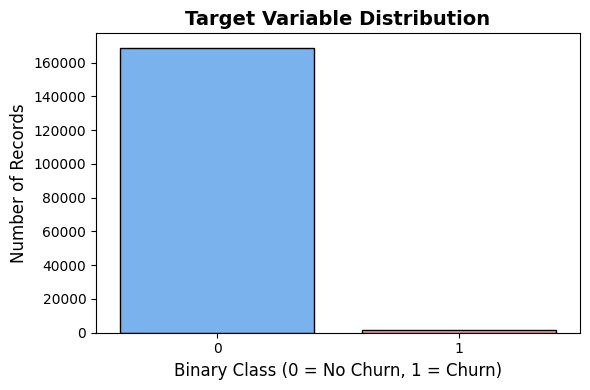

In [250]:
# Create a bar chart to visualize target class distribution
plt.figure(figsize = (6, 4))
ax = sns.countplot(
    x = 'clase_binaria',
    hue = 'clase_binaria',
    data = df,
    palette = {0: "#66B2FF", 1: "#FF9999"},  # 0 = Blue, 1 = Red
    legend = False,
    edgecolor = "black"
)

# Titles and labels
plt.title("Target Variable Distribution", fontsize = 14, weight = 'bold')
plt.xlabel("Binary Class (0 = No Churn, 1 = Churn)", fontsize = 12)
plt.ylabel("Number of Records", fontsize = 12)
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

Dataset is unbalanced. Since we'll be running models that support class weights we'll use that in order to balance it.
Using class weights adjusts the penalty during model training, assigning a higher weight to the minority class so that misclassifications cost more.

#### **Missing Values Handling (Nulls)**

In [251]:
# Check for missing values
print("Columns with Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns with Missing Values:
visa_marca_atraso             6101
visa_cuenta_estado            6101
visa_mfinanciacion_limite     6101
visa_msaldototal              6101
visa_msaldopesos              6101
visa_msaldodolares            6101
visa_mconsumospesos          21503
visa_mconsumosdolares        21503
visa_mlimitecompra            6101
visa_mpagado                  6101
visa_mpagospesos             21503
visa_mpagosdolares           21503
visa_mconsumototal           21503
visa_cconsumos               21503
visa_mpagominimo              6101
visa_tenure_days              6101
dtype: int64


In [252]:
# Check the data types of the fields that contain nulls to figure out how to treat them
df[missing_values[missing_values > 0].index.tolist()].dtypes

visa_marca_atraso             float64
visa_cuenta_estado           category
visa_mfinanciacion_limite     float64
visa_msaldototal              float64
visa_msaldopesos              float64
visa_msaldodolares            float64
visa_mconsumospesos           float64
visa_mconsumosdolares         float64
visa_mlimitecompra            float64
visa_mpagado                  float64
visa_mpagospesos              float64
visa_mpagosdolares            float64
visa_mconsumototal            float64
visa_cconsumos                float64
visa_mpagominimo              float64
visa_tenure_days              float64
dtype: object

Now, we want to understand how much impact these missing observations have on my target variable, 'clase_binaria'. This will help us decide whether dropping these rows would significantly affect the minority class (churn).

Distribution of clase_binaria in rows with nulls:
clase_binaria
0    20627
1      876
Name: count, dtype: int64


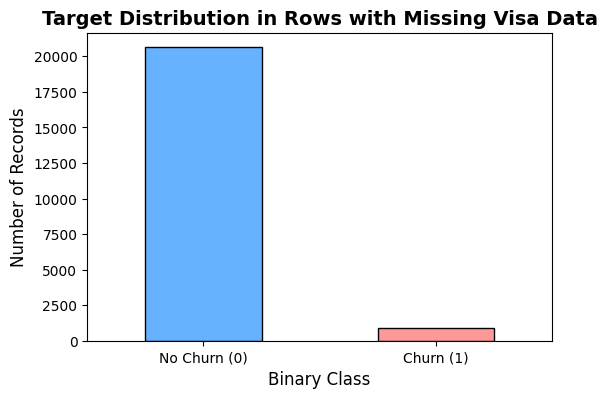

In [253]:
# Update the column name in the list
visa_cols_with_nulls = [
    'visa_marca_atraso', 'visa_cuenta_estado', 'visa_mfinanciacion_limite', 
    'visa_msaldototal', 'visa_msaldopesos', 'visa_msaldodolares', 
    'visa_mconsumospesos', 'visa_mconsumosdolares', 'visa_mlimitecompra', 
    'visa_mpagado', 'visa_mpagospesos', 'visa_mpagosdolares', 
    'visa_tenure_days', 'visa_mconsumototal', 'visa_cconsumos', 'visa_mpagominimo'
]

# Filter rows with at least one null value in the Visa columns
nulos_visa_df = df[df[visa_cols_with_nulls].isnull().any(axis = 1)]

# View the distribution of 'clase_binaria' in rows with nulls
null_churn_counts = nulos_visa_df['clase_binaria'].value_counts()

# Display results
print("Distribution of clase_binaria in rows with nulls:")
print(null_churn_counts)

# Plot the distribution of 'clase_binaria' in rows with missing values (Visa-related columns)
plt.figure(figsize = (6, 4))
ax = null_churn_counts.plot(
    kind = 'bar',
    color = ['#66B2FF', '#FF9999'],  # Blue = 0, Red = 1
    edgecolor = 'black'
)

# Titles and labels
plt.title("Target Distribution in Rows with Missing Visa Data", fontsize = 14, weight = 'bold')
plt.xlabel("Binary Class", fontsize = 12)
plt.ylabel("Number of Records", fontsize = 12)
plt.xticks(
    ticks = [0, 1],
    labels = ["No Churn (0)", "Churn (1)"],
    rotation = 0
);

Now, we calculate what percentage of the total would correspond to my minority class (clase_binaria = 1).

In [254]:
# Number of churn (1) cases in the null subset
churn_nulls = nulos_visa_df["clase_binaria"].value_counts()[1]

# Total churn (1) cases in the entire dataset
total_churn = df["clase_binaria"].value_counts()[1]

# 1) % of churn within the null subset
pct_churn_within_nulls = churn_nulls / len(nulos_visa_df) * 100

# 2) % of all churn cases that fall in rows with nulls
pct_churn_captured_by_nulls = churn_nulls / total_churn * 100

print(f"% of null rows that are churn: {pct_churn_within_nulls:.2f}%")
print(f"% of all churn cases that have nulls: {pct_churn_captured_by_nulls:.2f}%")

% of null rows that are churn: 4.07%
% of all churn cases that have nulls: 47.74%


The fact that 47.74% of the rows with null values correspond to churn (clase_binaria = 1) is a signal that dropping these rows would severely impact the representation of the minority class in the dataset. This could further worsen the imbalance and reduce the model's ability to correctly predict churns.

In our analysis, we decided to replace the null values in the Visa-related account variables with zeros. This approach does not distort the analysis or the model, as the null values in these variables can reasonably be interpreted as an “absence of activity” or “value not available.” By imputing zeros, we preserve all churn observations, avoid further damaging the class balance, and ensure the model processes these cases consistently without introducing bias.

In [255]:
columns_to_replace = [
    'visa_marca_atraso', 'visa_mfinanciacion_limite', 'visa_msaldototal',
    'visa_msaldopesos', 'visa_msaldodolares', 'visa_mconsumospesos',
    'visa_mconsumosdolares', 'visa_mlimitecompra', 'visa_mpagado',
    'visa_mpagospesos', 'visa_mpagosdolares', 'visa_mconsumototal',
    'visa_cconsumos', 'visa_mpagominimo', 'visa_cuenta_estado',
    'visa_tenure_days'
]

# Add 0 as a category only where needed
for col in columns_to_replace:
    if df[col].dtype == 'category':
        if 0 not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories([0])

# Fill NaNs with 0 across those columns
df.loc[:, columns_to_replace] = df[columns_to_replace].fillna(0)

# Verify
print("Replacement completed in numeric and categorical columns")
print(df[columns_to_replace].isnull().sum())

Replacement completed in numeric and categorical columns
visa_marca_atraso            0
visa_mfinanciacion_limite    0
visa_msaldototal             0
visa_msaldopesos             0
visa_msaldodolares           0
visa_mconsumospesos          0
visa_mconsumosdolares        0
visa_mlimitecompra           0
visa_mpagado                 0
visa_mpagospesos             0
visa_mpagosdolares           0
visa_mconsumototal           0
visa_cconsumos               0
visa_mpagominimo             0
visa_cuenta_estado           0
visa_tenure_days             0
dtype: int64


In [256]:
# Confirm the removal of missing values in the entire dataframe
print("Columns with Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


#### **Duplicated Values Handling**

In [257]:
# Detect duplicate rows in the dataframe
duplicates = df[df.duplicated()]

# Show the duplicate rows (if any)
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [cliente_vip, internet, cliente_edad, cliente_antiguedad, mrentabilidad, mrentabilidad_anual, mcomisiones, mactivos_margen, mpasivos_margen, cant_total_prod, tpaquete1, tpaquete2, tpaquete3, tpaquete4, tpaquete5, tpaquete6, tpaquete7, tpaquete8, tpaquete9, tcuentas, mdescubierto_preacordado, mcuentas_saldo, ctarjeta_debito_transacciones, mautoservicio, ctarjeta_visa, ctarjeta_visa_transacciones, mtarjeta_visa_consumo, ctarjeta_master, ctarjeta_master_transacciones, mtarjeta_master_consumo, cprestamos_personales, mprestamos_personales, cplazo_fijo, mplazo_fijo_dolares, mplazo_fijo_pesos, cfondos_comunes_inversion, mfondos_comunes_inversion_pesos, mfondos_comunes_inversion_dolares, ctitulos, mtitulos, cseguro_auto, cseguro_vivienda, cseguro_accidentes_personales, ccaja_seguridad, mbonos_corporativos, mmonedas_extranjeras, minversiones_otras, cplan_sueldo, mplan_sueldo, mplan_sueldo_manual, cplan_sueldo_transaccion, ccuenta_debitos_auto

There are no duplicate rows in the entire dataframe.

#### **Categorical Variables Analysis and Transformation (One-Hot Encoding)**

In [258]:
# Count columns
column_count = df.shape[1]

print(f"Number of columns in the dataframe: {column_count}")

Number of columns in the dataframe: 103


We transform the categorical independent variables using One-Hot Encoding. One-Hot Encoding is a technique used to transform categorical variables into a numeric format that machine learning models can understand. Instead of assigning a unique value to each category, it creates a new column for each possible category and assigns a 1 or 0 depending on whether the category is present in that row.

We have a categorical column called "tcuentas" with three possible values:

0. If the customer doesn't have any account.
1. If the customer has only savings accounts or only checking accounts.
2. If the customer has at least one savings account and at least one checking account.

Yet, there are no 0 values (although the feature dictionary mentions them).

When applying pd.get_dummies(), this would be converted into two columns:

* tcuentas_1

* tcuentas_2

If both columns are included in the model, whenever tcuentas_1 is 1, tcuentas_2 will always be 0, and vice versa. This creates redundancy, as one column can be deduced from the other. Therefore, we should remove one column from this set of dummy variables.

When we convert a categorical variable like "tcuentas" into dummy variables (using pd.get_dummies()), we get a binary column (0 or 1) for each category. However, if we include both columns, collinearity is introduced into the model, as one column can be deduced from the other. This redundancy can cause issues because regression models cannot properly handle this collinearity. For this reason, we use the drop_first = True feature to drop the first category and avoid this redundancy.

In [259]:
# Apply one-hot encoding to the categorical fields ("tcuentas" and "visa_cuenta_estado")
df = pd.get_dummies(df, drop_first = True)
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days,tcuentas_2,visa_cuenta_estado_11.0,visa_cuenta_estado_12.0,visa_cuenta_estado_19.0,visa_cuenta_estado_0.0
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,0,4473.0,False,False,False,False,False
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,0,7129.0,False,False,False,False,False
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,0,10584.0,False,False,False,False,False
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,0,3848.0,False,False,False,False,False
4,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.

In [260]:
# Check the new amount of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170722 entries, 0 to 170721
Columns: 106 entries, cliente_vip to visa_cuenta_estado_0.0
dtypes: bool(5), float64(48), int64(53)
memory usage: 132.4 MB


We're seeing a total of 106 columns since tcuentas was (1, 2) and visa_cuenta_estado was (0, 10, 11, 12, 19). Added a total of 3 new columns.

#### **Final Processed DataFrame**

In [261]:
# Check final df head
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days,tcuentas_2,visa_cuenta_estado_11.0,visa_cuenta_estado_12.0,visa_cuenta_estado_19.0,visa_cuenta_estado_0.0
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,0,4473.0,False,False,False,False,False
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,0,7129.0,False,False,False,False,False
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,0,10584.0,False,False,False,False,False
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,0,3848.0,False,False,False,False,False
4,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.

In [262]:
# Check final df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170722 entries, 0 to 170721
Columns: 106 entries, cliente_vip to visa_cuenta_estado_0.0
dtypes: bool(5), float64(48), int64(53)
memory usage: 132.4 MB


We will save the final dataframe in Parquet format. Saving the dataframe in Parquet format is better than CSV because Parquet is a columnar storage format, which makes it more efficient for reading and writing large datasets. It supports compression, reducing file size, and is optimized for performance when querying specific columns. Unlike CSV, Parquet preserves data types, ensuring consistency and reducing the risk of errors during data processing.

In [271]:
import os  # For directory handling

os.makedirs("../data/processed", exist_ok=True)  # Ensure folder exists

df.to_parquet(
    "../data/processed/churn_prediction_dataset.parquet",  # Save path
    index=False,        # Exclude DataFrame index
    engine="fastparquet"  # Use fastparquet engine
)